In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the digits dataset
digits = datasets.load_digits()

# Create a DataFrame with the pixel values and target labels
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

# Display the DataFrame
df



,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

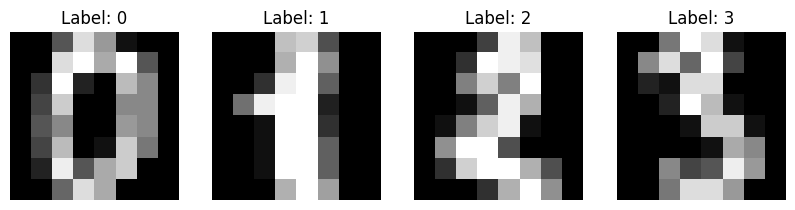

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')

plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)

model = SVC(gamma = 0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [6]:
y_pred = model.predict(X_test)
acc = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        acc += 1
print("Accuracy: ", acc/len(y_pred))

Accuracy:  0.9907407407407407


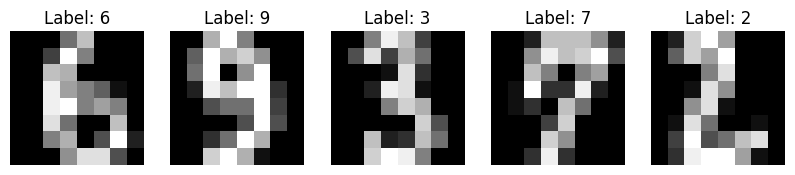

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8,8), cmap='gray')
    ax.set_title(f"Label: {y_pred[i]}")
    ax.axis('off')

In [8]:
# Build a classification report
report = classification_report(y_test, y_pred, target_names=[str(i) for i in digits.target_names])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       1.00      1.00      1.00        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       0.98      0.98      0.98        55
           8       0.98      1.00      0.99        43
           9       0.98      0.97      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



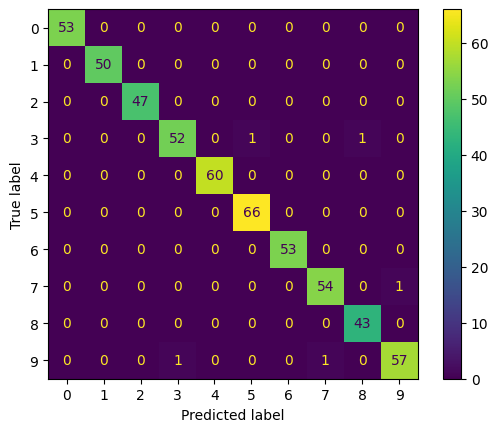

In [9]:
# Plot a confusion matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=digits.target_names)
disp.plot()
plt.show()

In [10]:
# Check if the confusion matrix is a sparse matrix
is_sparse = not (cm == 0).all(axis=0).all()  # False means it's not sparse
print(f"Is the confusion matrix a sparse matrix? {'Yes' if is_sparse else 'No'}")


Is the confusion matrix a sparse matrix? Yes


In [16]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, mutual_info_classif
target = digits.target
def apply_select_k_best(score_funcs, k=20):
    results = {}
    for score_func in score_funcs:
        selector = SelectKBest(score_func=score_func, k=k)
        selected_data = selector.fit_transform(data, target)
        results[score_func.__name__] = selected_data
    return results

def apply_select_percentile(score_funcs, percentiles):
    results = {}
    for score_func in score_funcs:
        for percentile in percentiles:
            selector = SelectPercentile(score_func=score_func, percentile=percentile)
            selected_data = selector.fit_transform(data, target)
            key = f"{score_func.__name__}_{percentile}"
            results[key] = selected_data
    return results

score_funcs = [chi2, f_classif, mutual_info_classif]

k_best_results = apply_select_k_best(score_funcs, k=20)

percentiles = [10, 20, 30]
percentile_results = apply_select_percentile(score_funcs, percentiles)

print("SelectKBest Results:")
for key, value in k_best_results.items():
    print(f"{key}: {value.shape}")

print("\nSelectPercentile Results:")
for key, value in percentile_results.items():
    print(f"{key}: {value.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarnin

SelectKBest Results:
chi2: (1797, 20)
f_classif: (1797, 20)
mutual_info_classif: (1797, 20)

SelectPercentile Results:
chi2_10: (1797, 7)
chi2_20: (1797, 13)
chi2_30: (1797, 19)
f_classif_10: (1797, 7)
f_classif_20: (1797, 13)
f_classif_30: (1797, 19)
mutual_info_classif_10: (1797, 7)
mutual_info_classif_20: (1797, 13)
mutual_info_classif_30: (1797, 19)


{'chi2': array([[ 1.,  0., 15., ...,  6.,  0.,  0.],
        [ 5.,  0.,  9., ...,  0., 10.,  0.],
        [12.,  0., 14., ...,  0., 16.,  9.],
        ...,
        [ 1.,  0.,  2., ...,  2.,  6.,  0.],
        [ 0.,  0., 15., ...,  5., 12.,  0.],
        [ 1.,  0.,  1., ...,  8., 12.,  1.]]),
 'f_classif': array([[ 5., 13., 15., ...,  6., 10.,  0.],
        [ 0.,  0.,  9., ...,  0., 16., 10.],
        [ 0.,  3., 14., ...,  0., 11., 16.],
        ...,
        [ 1., 13.,  2., ...,  2., 13.,  6.],
        [ 2., 14., 15., ...,  5., 16., 12.],
        [10., 16.,  1., ...,  8., 14., 12.]]),
 'mutual_info_classif': array([[ 5., 13., 15., ...,  0.,  6.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0., 10.],
        [ 0.,  3., 14., ...,  5.,  0., 16.],
        ...,
        [ 1., 13.,  2., ...,  0.,  2.,  6.],
        [ 2., 14., 15., ...,  2.,  5., 12.],
        [10., 16.,  1., ...,  8.,  8., 12.]])}

In [15]:
import pandas as pd

# Define a function to save the results of SelectKBest
def save_select_k_best_results(results):
    for key, value in results.items():
        df = pd.DataFrame(value)
        df.to_csv(f"select_k_best_{key}.csv", index=False)
        print(f"Saved select_k_best_{key}.csv")


save_select_k_best_results(k_best_results)


Saved select_k_best_chi2.csv
Saved select_k_best_f_classif.csv
Saved select_k_best_mutual_info_classif.csv
